In [29]:
import pandas as pd
import numpy as np

In [30]:
#read in data set
df = pd.read_csv("processed.cleveland copy.csv", delimiter= ',', names = ['age', 'sex', 'chestPain', 'restingBloodPressure', 'cholestoral', 'fastingBloodSugar', 'restingEKG', 'maxHeartRate', 'exerciseInducedAngina', 'exerciseDepressionRelatedToRest', 'slopePeakExercise', 'numMajorVessels', 'thal', 'diagnosis'])
df.head()

age  sex  chestPain  restingBloodPressure  cholestoral  fastingBloodSugar  \
0  63.0  1.0        1.0                 145.0        233.0                1.0   
1  67.0  1.0        4.0                 160.0        286.0                0.0   
2  67.0  1.0        4.0                 120.0        229.0                0.0   
3  37.0  1.0        3.0                 130.0        250.0                0.0   
4  41.0  0.0        2.0                 130.0        204.0                0.0   

   restingEKG  maxHeartRate  exerciseInducedAngina  \
0         2.0         150.0                    0.0   
1         2.0         108.0                    1.0   
2         2.0         129.0                    1.0   
3         0.0         187.0                    0.0   
4         2.0         172.0                    0.0   

   exerciseDepressionRelatedToRest  slopePeakExercise numMajorVessels thal  \
0                              2.3                3.0             0.0  6.0   
1                              1.5                2.0             3.0  3.0   
2                              2.6                2.0             2.0  7.0   
3                              3.5                3.0             0.0  3.0   
4                              1.4                1.0             0.0  3.0   

   diagnosis  
0          0  
1          2  
2          1  
3          0  
4          0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              303 non-null    float64
 1   sex                              303 non-null    float64
 2   chestPain                        303 non-null    float64
 3   restingBloodPressure             303 non-null    float64
 4   cholestoral                      303 non-null    float64
 5   fastingBloodSugar                303 non-null    float64
 6   restingEKG                       303 non-null    float64
 7   maxHeartRate                     303 non-null    float64
 8   exerciseInducedAngina            303 non-null    float64
 9   exerciseDepressionRelatedToRest  303 non-null    float64
 10  slopePeakExercise                303 non-null    float64
 11  numMajorVessels                  303 non-null    object 
 12  thal                  

In [32]:
# set diagnosis feature to binary value
df.loc[df.diagnosis != 0, 'diagnosis'] = 1
#df.loc[df.diagnosis == 0, 'diagnosis'] = 0

In [7]:
print(df['diagnosis'])

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: diagnosis, Length: 303, dtype: int64


In [33]:
#drop rows with missing values
# less than 5 rows had missing values so i chose to drop the rows rather than impute values
df = df.drop(df[df.thal == '?'].index)
df = df.drop(df[df.numMajorVessels == '?'].index)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              297 non-null    float64
 1   sex                              297 non-null    float64
 2   chestPain                        297 non-null    float64
 3   restingBloodPressure             297 non-null    float64
 4   cholestoral                      297 non-null    float64
 5   fastingBloodSugar                297 non-null    float64
 6   restingEKG                       297 non-null    float64
 7   maxHeartRate                     297 non-null    float64
 8   exerciseInducedAngina            297 non-null    float64
 9   exerciseDepressionRelatedToRest  297 non-null    float64
 10  slopePeakExercise                297 non-null    float64
 11  numMajorVessels                  297 non-null    object 
 12  thal                  

In [35]:
df = df.astype(float)
#df = df.convert_dtypes()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              297 non-null    float64
 1   sex                              297 non-null    float64
 2   chestPain                        297 non-null    float64
 3   restingBloodPressure             297 non-null    float64
 4   cholestoral                      297 non-null    float64
 5   fastingBloodSugar                297 non-null    float64
 6   restingEKG                       297 non-null    float64
 7   maxHeartRate                     297 non-null    float64
 8   exerciseInducedAngina            297 non-null    float64
 9   exerciseDepressionRelatedToRest  297 non-null    float64
 10  slopePeakExercise                297 non-null    float64
 11  numMajorVessels                  297 non-null    float64
 12  thal                  

In [37]:
import math
import matplotlib
import matplotlib.pyplot as plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4100A8D08>,
      dtype=object)

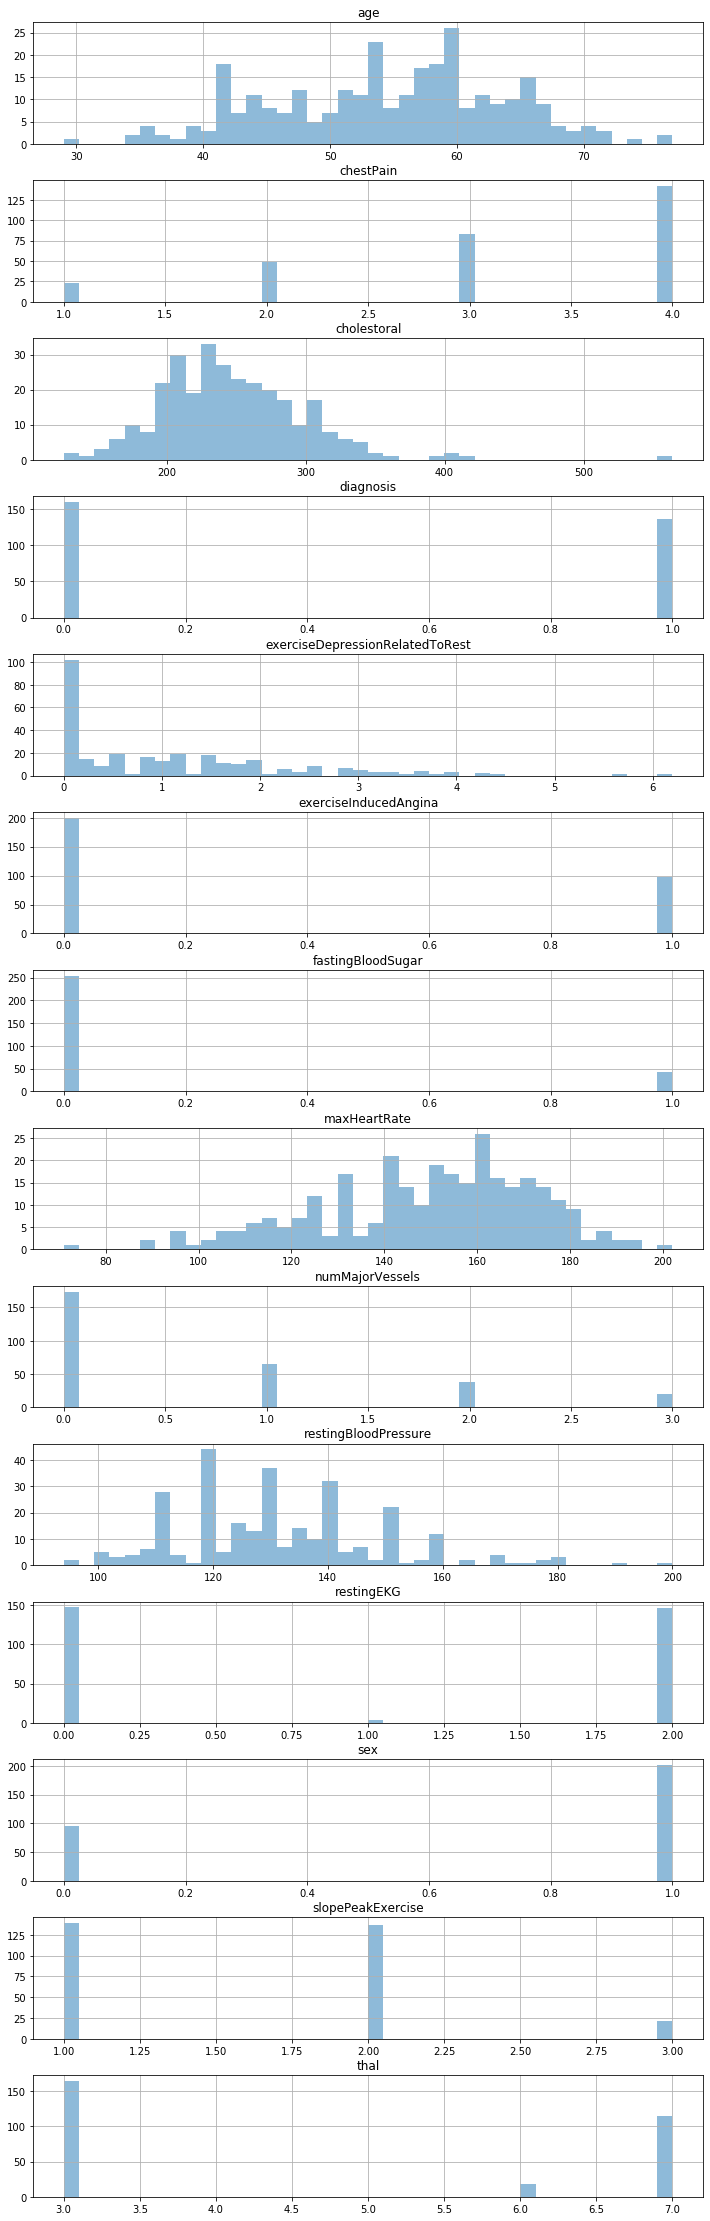

In [40]:
histListCam = ['age','sex', 'chestPain', 'restingBloodPressure', 'cholestoral','fastingBloodSugar','restingEKG','maxHeartRate', 'exerciseInducedAngina','exerciseDepressionRelatedToRest','slopePeakExercise', 'numMajorVessels', 'thal', 'diagnosis']
fig, ax = plt.subplots(14, figsize = (12,40))
dfHist = df[histListCam]
dfHist.hist(bins = 40, alpha = 0.5, ax = ax)

In [54]:
def removeOutliers(data):
    quantile3 = df[data].quantile(0.75)
    quantile1 = df[data].quantile(0.25)
    iqr = quantile3 - quantile1
    lowerLimit = quantile1 - 1.5*iqr
    upperLimit = quantile3 + 1.5*iqr
    
    df[data] = np.where(df[data] > upperLimit, df[data].mean(),df[data])
    df[data] = np.where(df[data] < lowerLimit, df[data].mean(),df[data])

In [55]:
removeOutliers('cholestoral')

In [56]:
removeOutliers('restingBloodPressure')
removeOutliers('exerciseDepressionRelatedToRest')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4362CEC08>,
      dtype=object)

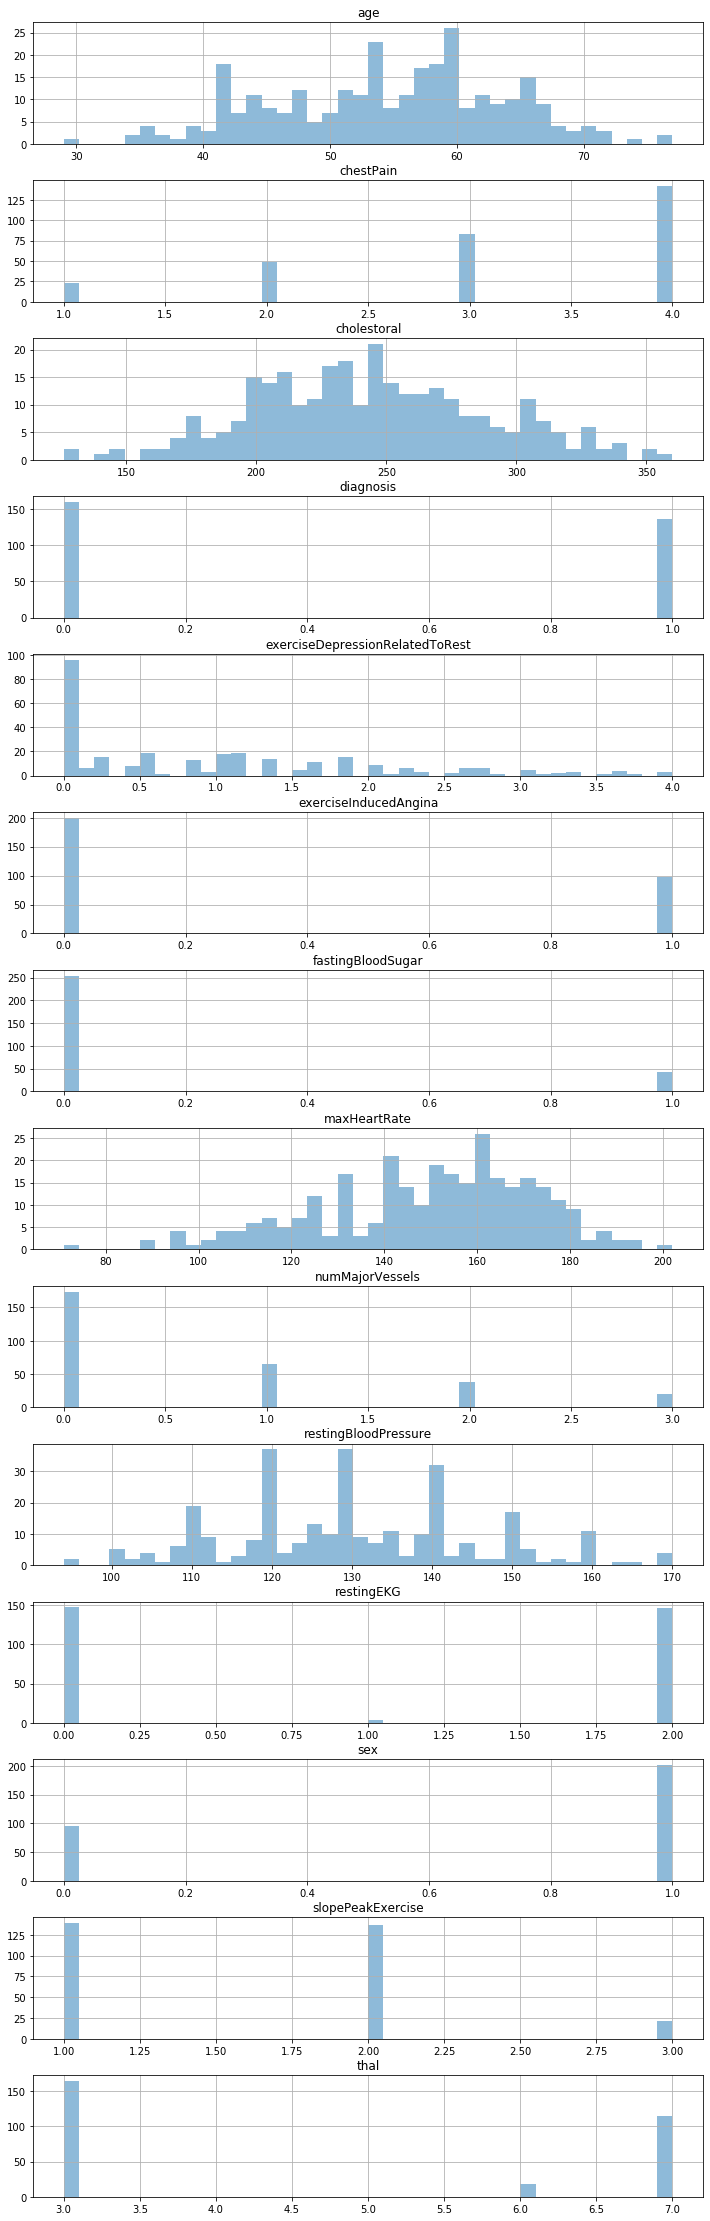

In [57]:
histListCam = ['age','sex', 'chestPain', 'restingBloodPressure', 'cholestoral','fastingBloodSugar','restingEKG','maxHeartRate', 'exerciseInducedAngina','exerciseDepressionRelatedToRest','slopePeakExercise', 'numMajorVessels', 'thal', 'diagnosis']
fig, ax = plt.subplots(14, figsize = (12,40))
dfHist = df[histListCam]
dfHist.hist(bins = 40, alpha = 0.5, ax = ax)

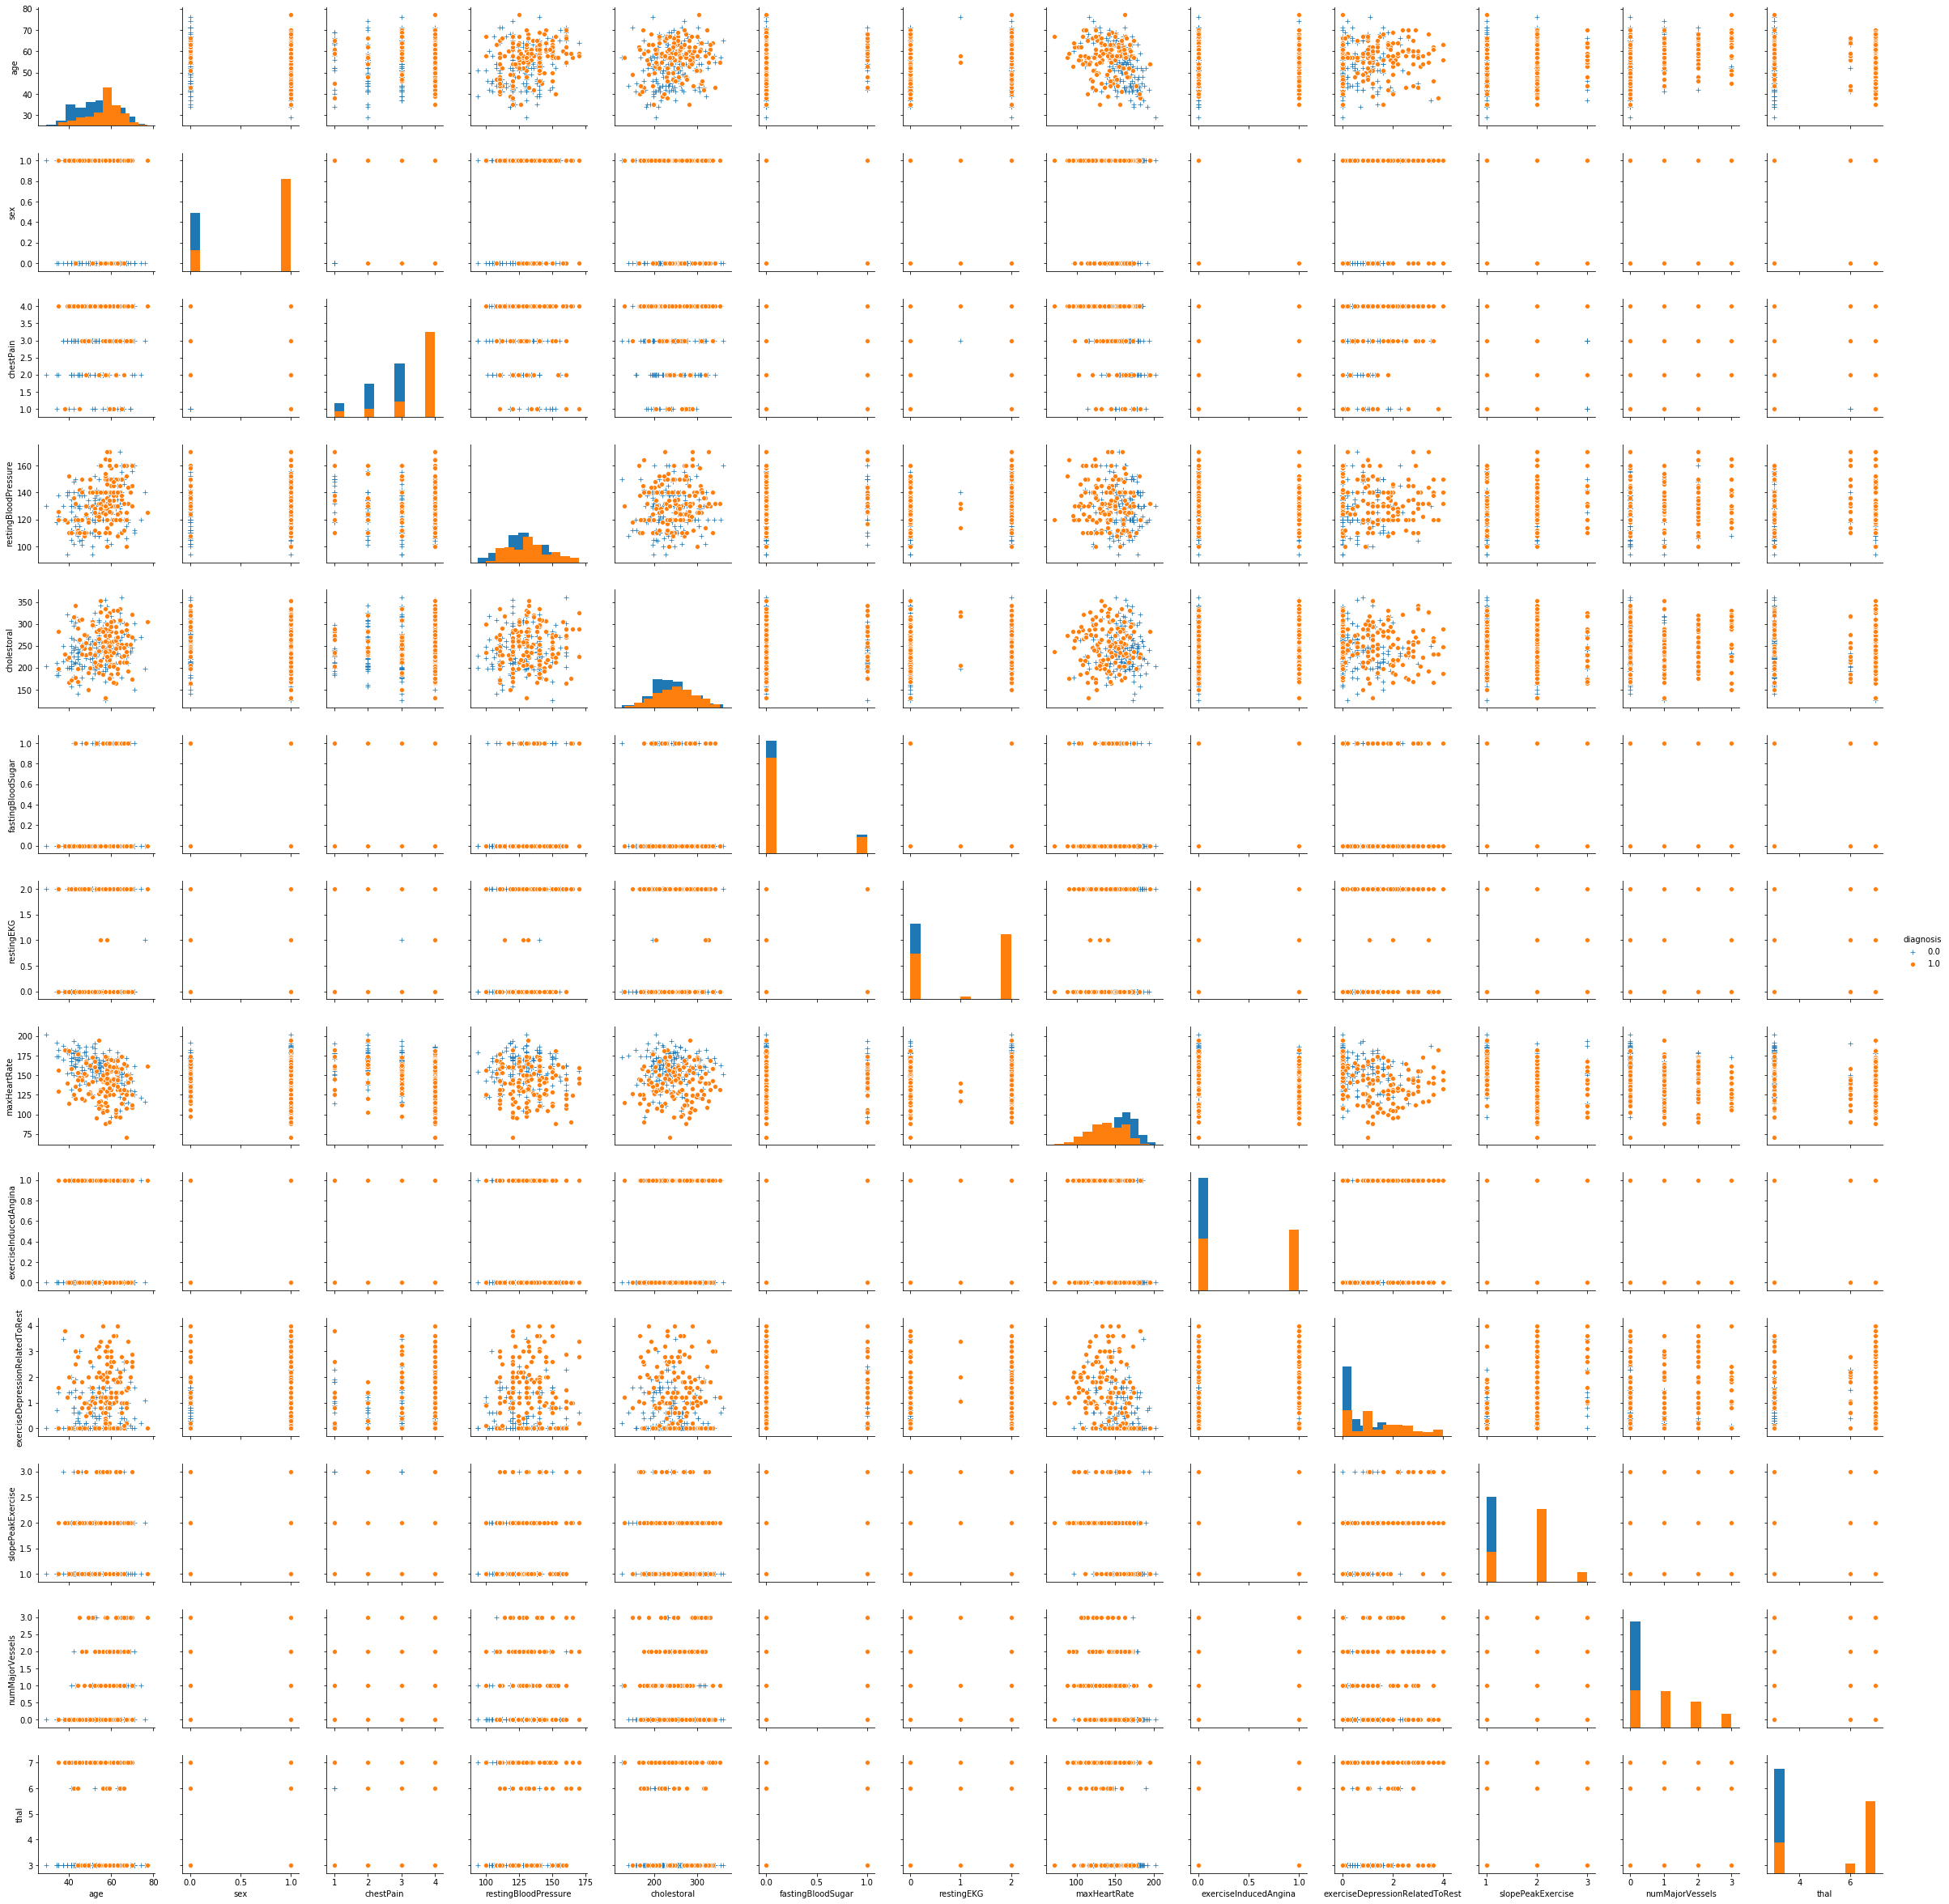

In [58]:
import seaborn as sns
pairplotImage = sns.pairplot(df, hue = 'diagnosis', markers= ['+', 'o'], diag_kind= 'hist' )

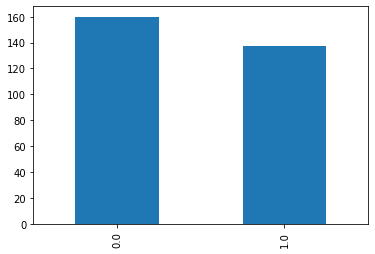

In [43]:
df['diagnosis'].value_counts().plot(kind = 'bar')

In [59]:
#output cleaned dataframe to new csv for modeling
df.to_csv("cleavlandBinaryNoHeadIndex.csv", header = False, index = False)

In [60]:
import numpy
dataset = numpy.loadtxt("cleavlandBinaryNoHeadIndex.csv", delimiter=",")

In [61]:
print(dataset)

[[63.  1.  1. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  1.]
 [67.  1.  4. ...  2.  7.  1.]
 ...
 [68.  1.  4. ...  2.  7.  1.]
 [57.  1.  4. ...  1.  7.  1.]
 [57.  0.  2. ...  1.  3.  1.]]


In [64]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load clean csv
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

In [65]:
# define 10-fold cross validation test harness
# model trained with 150 epochs and a batch size of 10
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
	model = Sequential()
	model.add(Dense(12, input_dim= 13, activation='relu'))
	model.add(Dense(8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

#accuracy of validations at mean accuracy 

accuracy: 80.00%
accuracy: 90.00%
accuracy: 86.67%
accuracy: 90.00%
accuracy: 76.67%
accuracy: 86.67%
accuracy: 80.00%
accuracy: 79.31%
accuracy: 72.41%
accuracy: 89.66%
83.14% (+/- 5.94%)


In [66]:
#100 epochs, batch size = 32
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
	model = Sequential()
	model.add(Dense(12, input_dim= 13, activation='relu'))
	model.add(Dense(8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model.fit(X[train], Y[train], epochs=100, batch_size=32, verbose=0)
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

accuracy: 76.67%
accuracy: 90.00%
accuracy: 86.67%
accuracy: 76.67%
accuracy: 73.33%
accuracy: 70.00%
accuracy: 60.00%
accuracy: 51.72%
accuracy: 65.52%
accuracy: 75.86%
72.64% (+/- 10.94%)


In [68]:
#1000 epoch, batch size 5
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
	model = Sequential()
	model.add(Dense(12, input_dim= 13, activation='relu'))
	model.add(Dense(8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model.fit(X[train], Y[train], epochs=1000, batch_size=5, verbose=0)
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

accuracy: 86.67%
accuracy: 93.33%
accuracy: 86.67%
accuracy: 83.33%
accuracy: 83.33%
accuracy: 86.67%
accuracy: 73.33%
accuracy: 86.21%
accuracy: 65.52%
accuracy: 89.66%
83.47% (+/- 7.74%)


In [14]:
#manual test cases

from numpy import array
predictData0 = numpy.array([[63.0, 1.0, 1.0, 145.0, 233.0, 1.0, 2.0, 150.0, 0.0, 2.3, 3.0, 0.0, 6.0]])
predictData1 = numpy.array([[67.0, 1.0, 4.0, 160.0, 286.0, 0.0, 2.0, 108.0, 1.0, 1.5, 2.0, 3.0,3.0]])
print(predictData0)
prediction0 = model.predict(predictData0)
print(predictData1)
prediction1 = model.predict(predictData1)
print(prediction0)
print(prediction1)


[[ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
    6. ]]
[[ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
    3. ]]
[[0.12470183]]
[[0.98461413]]
